In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
pd.plotting.register_matplotlib_converters()
%matplotlib inline

#from fbprophet import Prophet

In [5]:
df_recent = pd.read_csv('../data/energy_recent_clean.csv', index_col = 'date')
df_past = pd.read_csv('../data/energy_past_clean.csv', index_col = 'date')

df_recent.set_index(pd.to_datetime(df_recent.index), inplace = True)
df_past.set_index(pd.to_datetime(df_past.index), inplace = True)

## Geothermal Power: [Source](https://en.wikipedia.org/wiki/Geothermal_energy_in_the_United_States)

- Geothermal isn't a big player by any respects, but it is a steady one with low variability should scale be applied to it. 

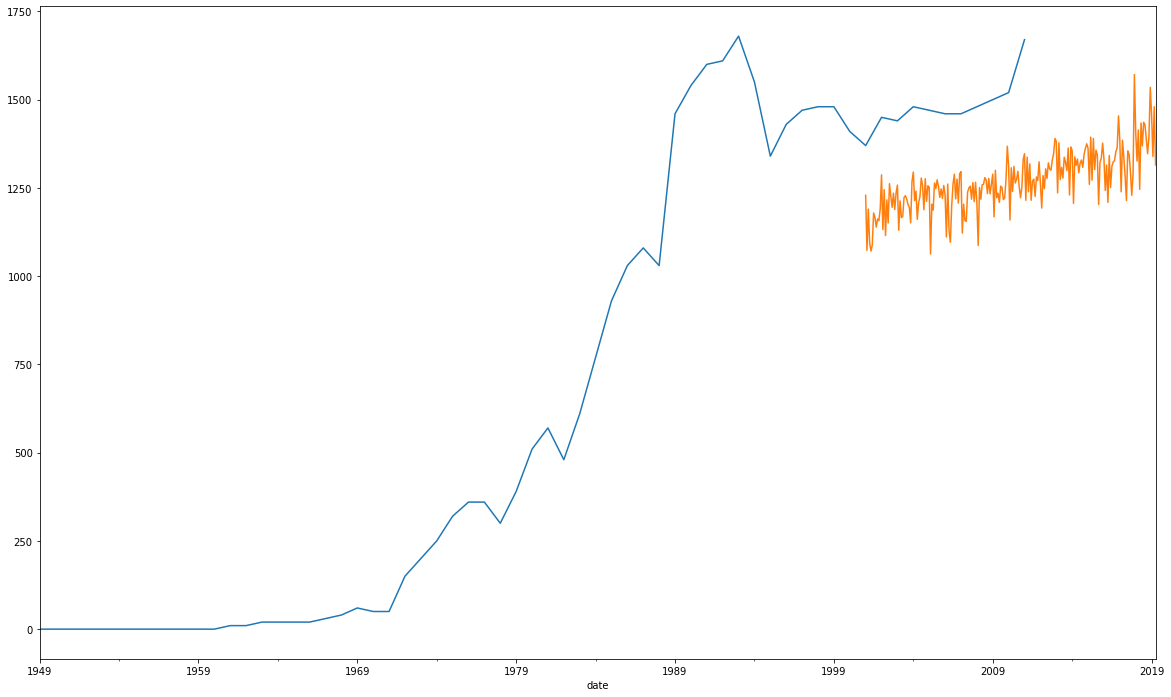

In [6]:
plt.figure(figsize = (20,12))
df_past['Geo- thermal'].plot()
df_recent['Geo- thermal'].plot()

#df_past['Total'].plot()
#df_recent['Total'].plot()

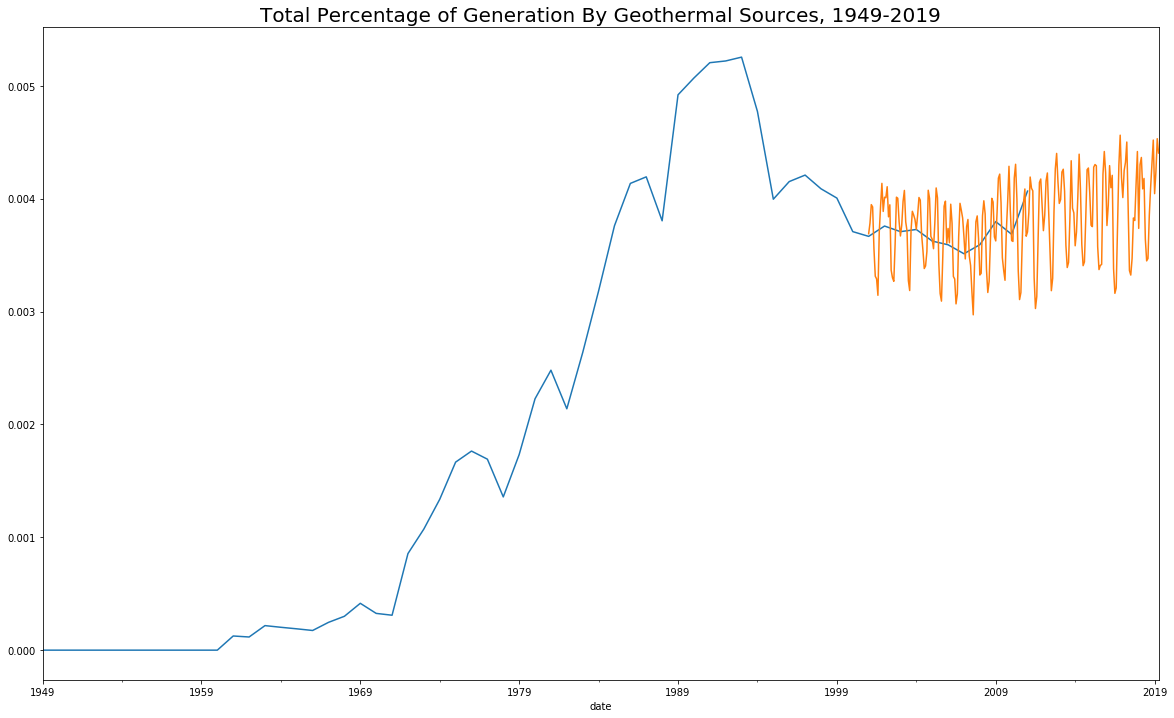

In [7]:
plt.figure(figsize = (20,12))
(df_past['Geo- thermal']/df_past['Total']).plot()
(df_recent['Geo- thermal']/df_recent['Total']).plot()
plt.title("Total Percentage of Generation By Geothermal Sources, 1949-2019", size = 20);

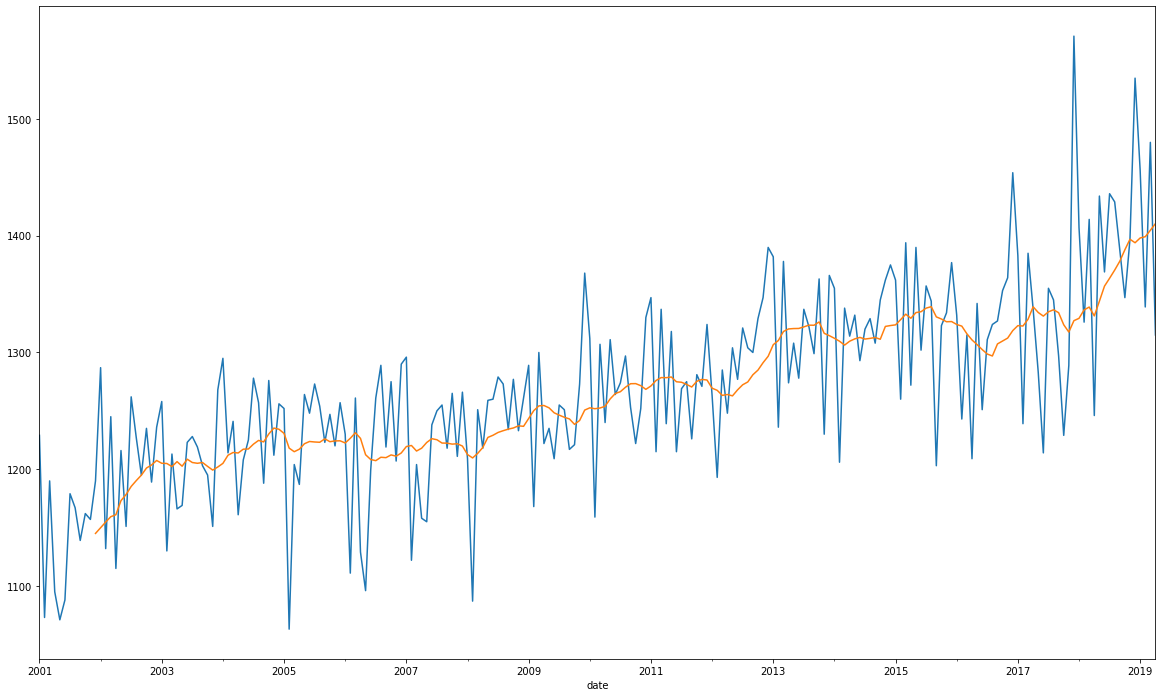

In [8]:
df_recent['Geo- thermal'].plot(figsize = (20,12))
df_recent['Geo- thermal'].rolling(12).mean().plot()

In [9]:
geo = pd.DataFrame(data = df_recent.index)
geo['y'] = list(df_recent['Geo- thermal'])
geo.rename(columns = {'date': 'ds'}, inplace = True)
geo['cap'] = 2000
geo.head()

,ds,y,cap
0,2001-01-01,1229.0,2000
1,2001-02-01,1073.0,2000
2,2001-03-01,1190.0,2000
3,2001-04-01,1095.0,2000
4,2001-05-01,1071.0,2000


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
train, test = train_test_split(geo, shuffle = False)
model_train = Prophet(growth = 'linear', seasonality_mode= 'multiplicative')
model_train.fit(train)
train_future = model_train.make_future_dataframe(periods = test.shape[0], freq = 'M')
train_pred = model_train.predict(train_future)
np.sqrt(mean_squared_error(test['y'], train_pred['yhat'][-55:]))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


57.18855074779286

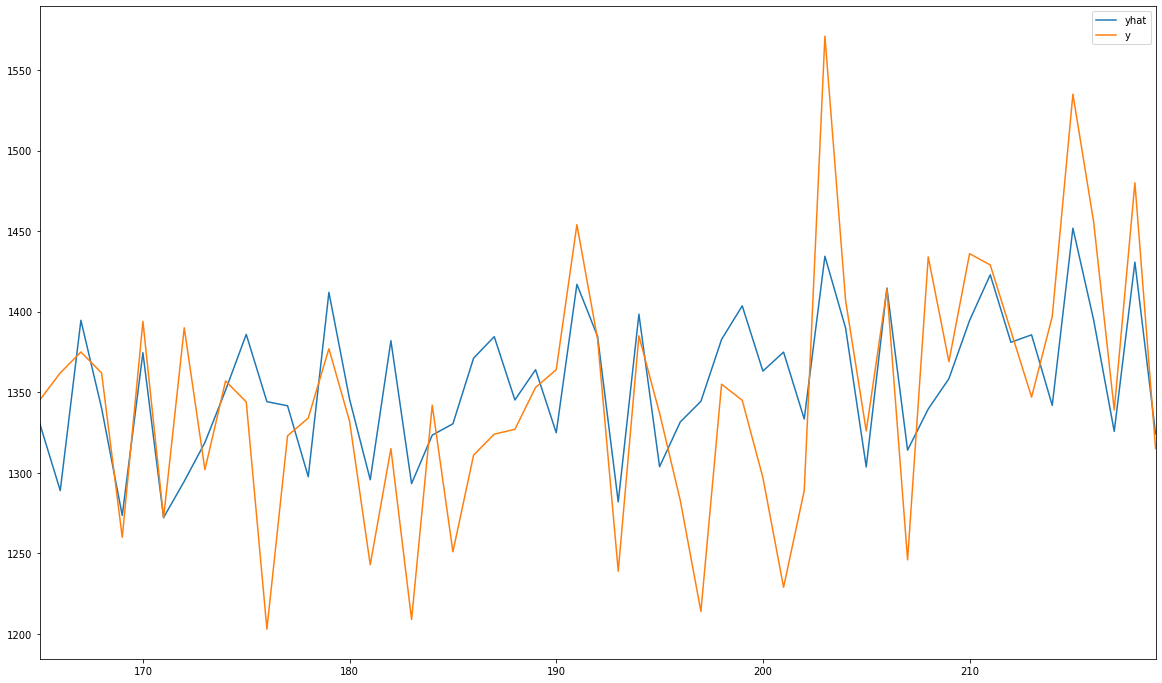

In [11]:
plt.figure(figsize = (20,12))
train_pred['yhat'][-55:].plot()
test['y'].plot()
plt.legend()

In [42]:
model_geo = Prophet(growth = 'linear', seasonality_mode= 'multiplicative', n_changepoints= 1)
model_geo.fit(geo)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
geo_future = model_geo.make_future_dataframe(periods = 372, freq = 'M')
geo_future['cap'] = 2000
geo_future.tail()

,ds,cap
587,2049-11-30,2000
588,2049-12-31,2000
589,2050-01-31,2000
590,2050-02-28,2000
591,2050-03-31,2000


In [44]:
geo_pred = model_geo.predict(geo_future)

In [45]:
geo_pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
577,2049-01-31,1813.744616,1585.309893,2041.051457
578,2049-02-28,2002.995816,1753.862991,2238.286746
579,2049-03-31,1801.470299,1570.946528,2019.910173
580,2049-04-30,1893.749721,1649.447990,2131.128969
581,2049-05-31,1887.858979,1640.574017,2106.776821
582,2049-06-30,1953.537863,1704.104711,2200.008956
583,2049-07-31,1980.171065,1734.496644,2225.381529
584,2049-08-31,1871.935152,1628.288342,2098.922300
585,2049-09-30,1939.797970,1691.096887,2167.181631
586,2049-10-31,1919.998103,1672.054032,2153.593579


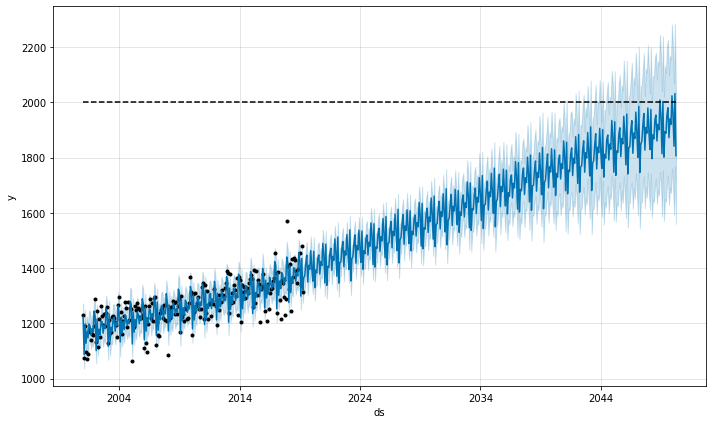

In [46]:
fig1 = model_geo.plot(geo_pred)

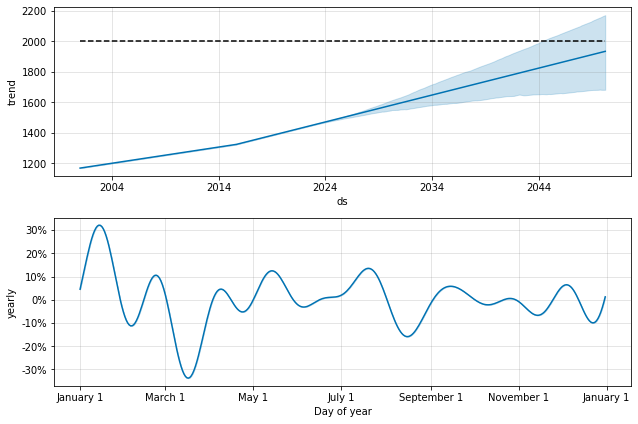

In [47]:
fig2 = model_geo.plot_components(geo_pred)

## Key Takeaways:


- Nothing too surprising honestly, it's going up in a predictable pattern but never amounts to too much of the total energy sector

In [48]:
geo_pred.to_csv("../data/Predictions_Geothermal")